# Bidirectional LSTM
This notebook lays out the Bidirectional LSTM neural network I used to obtain my results. It goes through preprocessing the text data, training the model, and output accuracy & loss graphs.

In [12]:
import pandas as pd

# Read Input

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

X_train, y_train = train["comment_text"], train[labels]
X_test, y_test = test["comment_text"], test[labels]

In [13]:
# Model Variables

embed_size = 32
max_features = 10000
maxlen = 200
batch_size = 1024

dropout = 0.2

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Preprocess the text

tokenizer = Tokenizer(num_words=max_features,lower=True)
tokenizer.fit_on_texts(list(X_train))

X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_tok, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_tok, maxlen=maxlen)

In [7]:
from keras.layers import Embedding, Dense, LSTM, Bidirectional
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

# Build the model

model = Sequential()
model.add(Embedding(max_features,embed_size))
model.add(Bidirectional(LSTM(embed_size, dropout = dropout, recurrent_dropout = dropout)))
model.add(Dense(len(labels), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics = ['accuracy'])

filepath='models/advanced_LSTM_weights_best.hdf5'
checkpoint_callback = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train_padded, y_train, epochs = 8, batch_size = batch_size, 
                    validation_split=0.2, callbacks = [checkpoint_callback])

Train on 102124 samples, validate on 25532 samples
Epoch 1/8
101376/102124 [============================>.] - ETA: 1s - loss: 0.2590 - acc: 0.9598
Epoch 00001: val_acc improved from -inf to 0.96241, saving model to models/advanced_LSTM_weights_best.hdf5
102124/102124 [==============================] - 157s 2ms/step - loss: 0.2582 - acc: 0.9598 - val_loss: 0.1433 - val_acc: 0.9624
Epoch 2/8
101376/102124 [============================>.] - ETA: 1s - loss: 0.1357 - acc: 0.9637
Epoch 00002: val_acc improved from 0.96241 to 0.96244, saving model to models/advanced_LSTM_weights_best.hdf5
102124/102124 [==============================] - 155s 2ms/step - loss: 0.1357 - acc: 0.9637 - val_loss: 0.1326 - val_acc: 0.9624
Epoch 3/8
101376/102124 [============================>.] - ETA: 1s - loss: 0.1048 - acc: 0.9658
Epoch 00003: val_acc improved from 0.96244 to 0.96892, saving model to models/advanced_LSTM_weights_best.hdf5
102124/102124 [==============================] - 149s 1ms/step - loss: 0.104

In [15]:
# Predict the test set

y_test_predicted = model.predict(X_test_padded, batch_size = batch_size, verbose = 1)

test[labels] = y_test_predicted

test.to_csv('submissions/test_bidirectional_LSTM.csv', index=False)

31915/31915 [==============================] - 10s 310us/step


In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

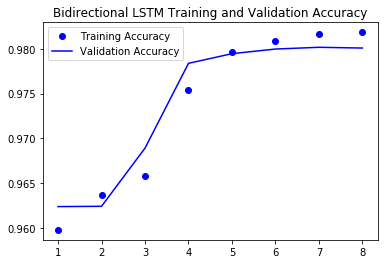

In [16]:
f = plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Bidirectional LSTM Training and Validation Accuracy')
plt.legend()
f.savefig("visuals/biLSTM_accuracy.pdf")

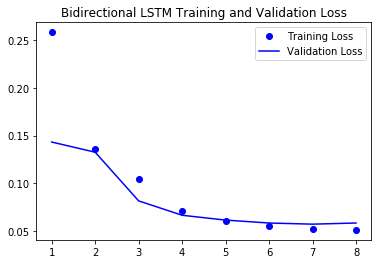

In [17]:
f = plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Bidirectional LSTM Training and Validation Loss')
plt.legend()
f.savefig("visuals/biLSTM_loss.pdf")